In [8]:
import matplotlib.pyplot as plt   
import numpy as np    
from matplotlib.image import imread
import cv2
import math

Zadanie 1. Zaimplementuj filtry Sobela a następnie przetestuj na przykładowej fotografii 1D (odcienie szarości).

In [70]:
img = imread('georgia.jpg') 
[nx, ny, nz] = np.shape(img)

In [71]:
r_img = img[:, :, 0]
g_img = img[:, :, 1]
b_img = img[:, :, 2]
gamma = 1.5
r = 0.2126
g = 0.7152 
b = 0.0722 
img_gray = r * r_img ** gamma + g * g_img ** gamma + b * b_img ** gamma

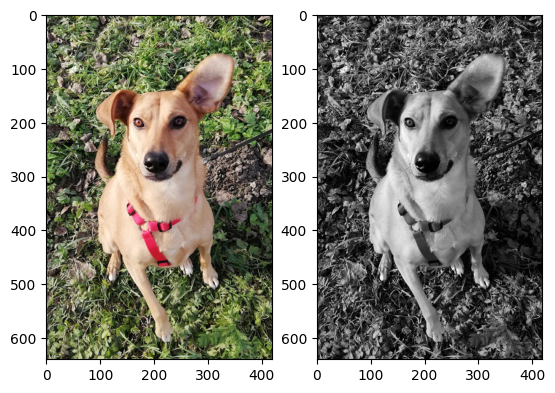

In [72]:
fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(img)
ax2.imshow(img_gray, cmap=plt.get_cmap('gray'))

In [73]:
x = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
y = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
[rows, columns] = np.shape(img_gray) 
img_sobel = np.zeros(shape=(rows, columns)) 

In [74]:
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(x, img_gray[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(y, img_gray[i:i + 3, j:j + 3]))
        img_sobel[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)

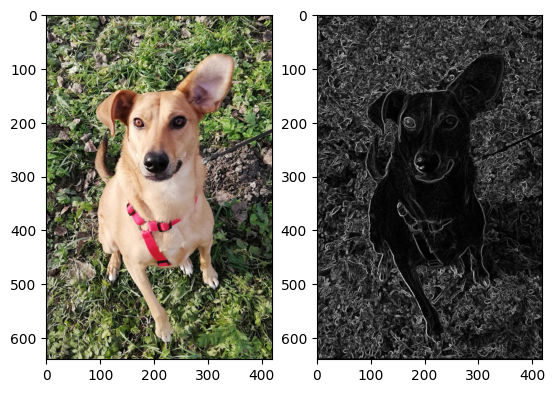

In [75]:
fig2 = plt.figure(2)
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))

Zadanie 2. Uzasadnij, że liczba parametrów warstwy konwolucyjnej wyraża się następującym wzorem:

P = n * kw * kh * kc + n

gdzie:<br />
n - liczba kanałów wyjściowych<br />
kw - szerokość filtru<br />
kh - wysokość filtru<br />
kc - liczba kanałów wejściowych

Ogólny wzór: 
(m * n * d)+1)* k 

Liczba parametrów warstwy konwolucyjnej =  liczba elementów których algorytm może się nauczyć dla filtra; 
Aby obliczyć parametry warstwy konwolucyjnej należy pomnożyć wymiary filtru (u nas: kw x kh) przez ilość filtrów poprzedniej warstwy (kc) i uwzględnić odchylenia dla każdego filtra (jak rozumiem, stąd jest ta  dodana 1). Całość otrzymanego do tej pory wyrażenia należy pomnożyć przez liczbę filtrów (u nas n - liczba kanałów wyjściowych). 
To samo wyrażenie można zapisać w następujący sposób: ((kształt szerokości filtra * kształt wysokości filtra * liczba filtrów w poprzedniej warstwie + 1) * liczba filtrów).

u nas:
((kw * kh * kc) +1) * n --> (kw* kh * kc + 1)* n --> n * kw * kh * kc + n


(korzystałam z tego źródła: https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d)

Zadanie 3. Uzasadnij, że rozmiar wynikowej mapy cech wyraża się poprzez:

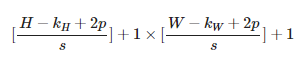

In [76]:
display.Image("wzor.png", width="300", height="50")


gdzie:<br />
kw - szerokość filtru<br />
kh - wysokość filtru<br />
W - szerokość wejściowej mapy cech<br />
H - wysokość wejściowej mapy cech<br />
s - krok<br />
p - rozmiar rozszerzenia obrazu (w pikselach, padding)

Rozmiar wynikowej mapy to wysokość x szerokość, gdzie oba z tych wymiarów liczone są w ten sposób, że od wymiaru mapy wejściowej (H lub W) odejmowany jest odpowiedni wymiar filtru (kh lub kw), a ponadto dodany zostaje rozmiar rozszerzenia obrazu - padding. W ogólnym wzorze podstawia się jako padding Pstart + Pend, ale ze względu na to że zwykle Pstart = Pend to do wzoru dla uproszczenia wstawia się 2p. Całość wyrażenia dzielona jest przez krok (stride) z jakkim przesuwamy filtr (np. gdy s=1, to przesuwamy filtry o jeden piksel na raz). Do całości wyrażenia (obliczanego wymiaru) dodajemy 1, natomiast nie wiem skąd się ona bierze (czy, tak jak w zadaniu wyżej, jest to odchylenie?)

(źródło: https://cs231n.github.io/convolutional-networks/#conv,  https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

Zadanie 4. Napisać funkcje do interpolacji zdjęć na dowolnie zadany wymiar. Przykładowo, mamy zdjecie 4x5, chcemy 10x12. Uwaga: W przypadku wielokrotności rozmiaru jest to stosunkowo proste zadanie.

#To zadanie mnie przerosło mimo prób, zostawię niżej jedno z podejść które próbowałam

In [18]:
def interpolation(image, y, x):
    
    height = image.shape[0]
    width = image.shape[1]

    x1 = max(min(math.floor(x), width - 1), 0)
    y1 = max(min(math.floor(y), height - 1), 0)
    x2 = max(min(math.ceil(x), width - 1), 0)
    y2 = max(min(math.ceil(y), height - 1), 0)

    a = float(image[y1, x1])
    b = float(image[y2, x1])
    c = float(image[y1, x2])
    d = float(image[y2, x2])

    dx = x - x1
    dy = y - y1

    new_pixel = a * (1 - dx) * (1 - dy)
    new_pixel += b * dy * (1 - dx)
    new_pixel += c * dx * (1 - dy)
    new_pixel += d * dx * dy
    
    return round(new_pixel)


def resize(image, new_height, new_width):
    
    new_image = np.zeros((new_height, new_width), image.dtype) 
    
    original_height = image.shape[0]
    original_width = image.shape[1]

    x_original_center = (original_width-1) / 2
    y_original_center = (original_height-1) / 2

    x_scaled_center = (new_width-1) / 2
    y_scaled_center = (new_height-1) / 2

    scale_x = original_width / new_width;
    scale_y = original_height / new_height;

    for y in range(new_height):
        for x in range(new_width):
            x_ = (x - x_scaled_center) * scale_x + x_original_center
            y_ = (y - y_scaled_center) * scale_y + y_original_center

            new_image[y, x] = interpolation(image, y_, x_)

    return new_image

In [19]:
img = cv2.imread('georgia.jpg', cv2.IMREAD_GRAYSCALE)  
resized_img = resize(img, 500, 400)
